KHIZAR MEHMOOD
01-134212-074

TASK: 01

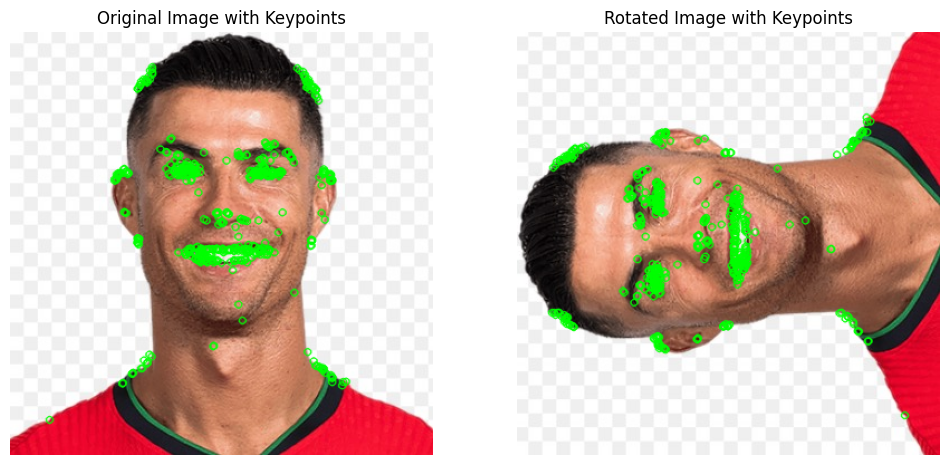

Images with keypoints have been saved and displayed.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_image(file_path):
    # Read the image from the file
    image = cv2.imread(file_path)
    
    if image is None:
        raise Exception(f"Failed to read image from {file_path}")
    
    return image

def rotate_image(image, angle):
    # Get the dimensions of the image
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    
    # Perform the rotation
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    
    return rotated

def detect_features(image, name):
    # Initialize ORB detector
    orb = cv2.ORB_create()
    
    # Detect keypoints and descriptors
    keypoints, descriptors = orb.detectAndCompute(image, None)
    
    # Draw keypoints on the image
    image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=0)
    
    # Save the image with keypoints
    cv2.imwrite(f"{name}_with_keypoints.jpg", image_with_keypoints)
    
    return image_with_keypoints, keypoints

def display_images(original_image, rotated_image, original_keypoints, rotated_keypoints):
    # Convert images from BGR to RGB for matplotlib
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    rotated_image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)
    
    # Display the original image with keypoints
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Original Image with Keypoints')
    plt.imshow(original_image_rgb)
    plt.axis('off')
    
    # Display the rotated image with keypoints
    plt.subplot(1, 2, 2)
    plt.title('Rotated Image with Keypoints')
    plt.imshow(rotated_image_rgb)
    plt.axis('off')
    
    plt.show()

def main():
    try:
        # Path to the image file
        image_path = 'img3.jpg'
        
        # Read the image
        original_image = read_image(image_path)
        
        # Rotate the image by 90 degrees
        rotated_image = rotate_image(original_image, 90)
        
        # Detect features on the original image
        original_image_with_keypoints, original_keypoints = detect_features(original_image, "original_image")
        
        # Detect features on the rotated image
        rotated_image_with_keypoints, rotated_keypoints = detect_features(rotated_image, "rotated_image")
        
        # Display the images with keypoints
        display_images(original_image_with_keypoints, rotated_image_with_keypoints, original_keypoints, rotated_keypoints)
        
        print("Images with keypoints have been saved and displayed.")
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()

TASK: 02

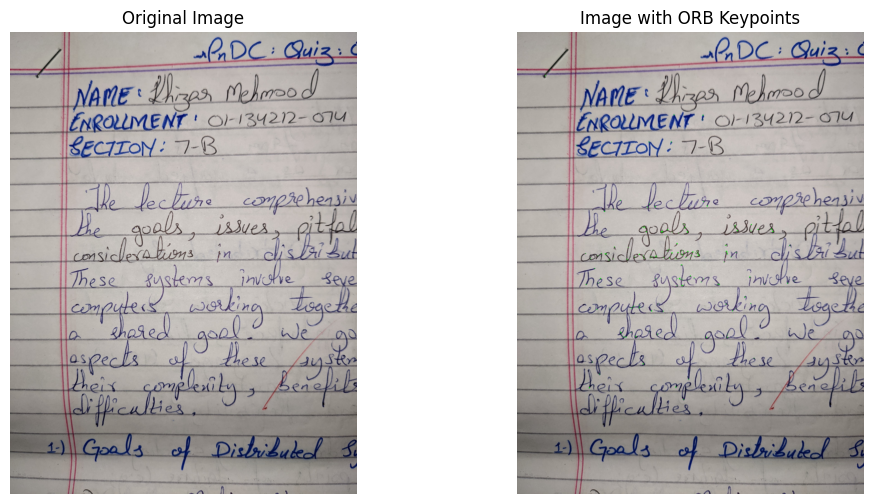

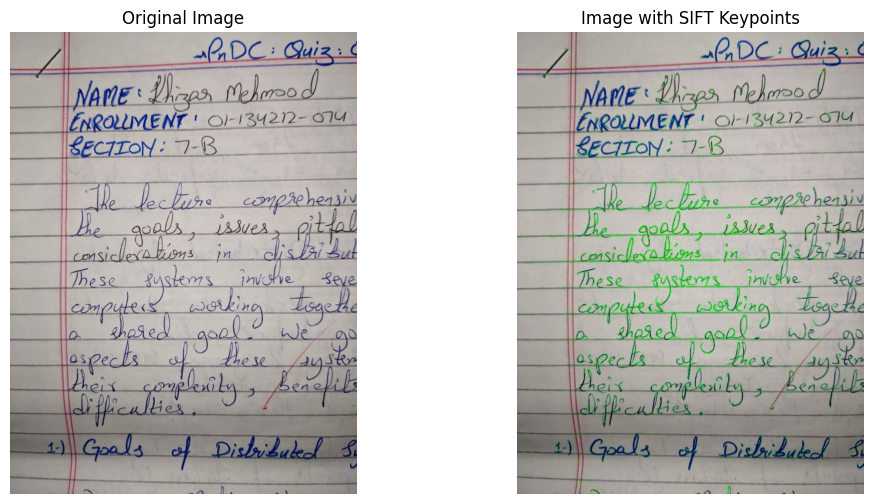

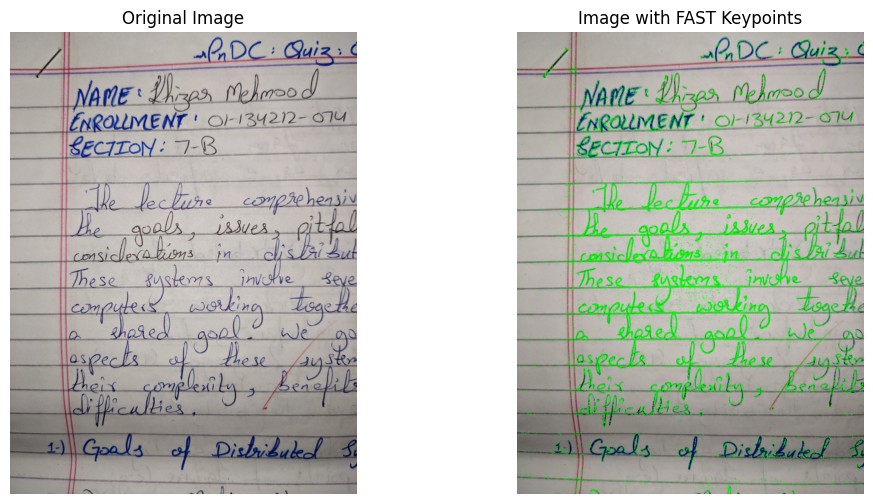

Images with keypoints have been displayed.


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_image(file_path):
    # Read the image from the file
    image = cv2.imread(file_path)
    
    if image is None:
        raise Exception(f"Failed to read image from {file_path}")
    
    return image

def detect_features(image, method='ORB'):
    # Initialize the feature detector based on the method
    if method == 'ORB':
        detector = cv2.ORB_create()
    elif method == 'SIFT':
        detector = cv2.SIFT_create()
    elif method == 'FAST':
        detector = cv2.FastFeatureDetector_create()
    else:
        raise ValueError("Unsupported method. Choose 'ORB', 'SIFT', or 'FAST'.")
    
    # Detect keypoints
    keypoints = detector.detect(image, None)
    
    # Draw keypoints on the image
    image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=0)
    
    return image_with_keypoints, keypoints

def display_images(original_image, image_with_keypoints, method):
    # Convert images from BGR to RGB for matplotlib
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    image_with_keypoints_rgb = cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB)
    
    # Display the original image and the image with keypoints
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original_image_rgb)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title(f'Image with {method} Keypoints')
    plt.imshow(image_with_keypoints_rgb)
    plt.axis('off')
    
    plt.show()

def main():
    try:
        # Path to the image file
        image_path = 'hw.jpg'
        
        # Read the image
        original_image = read_image(image_path)
        
        # Detect features using ORB
        orb_image_with_keypoints, _ = detect_features(original_image, method='ORB')
        
        # Detect features using SIFT
        sift_image_with_keypoints, _ = detect_features(original_image, method='SIFT')
        
        # Detect features using FAST
        fast_image_with_keypoints, _ = detect_features(original_image, method='FAST')
        
        # Display the images with keypoints
        display_images(original_image, orb_image_with_keypoints, 'ORB')
        display_images(original_image, sift_image_with_keypoints, 'SIFT')
        display_images(original_image, fast_image_with_keypoints, 'FAST')
        
        print("Images with keypoints have been displayed.")
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()